In [4]:
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
data = pd.read_csv("C:/Users/Santhoshkumar/Desktop/Abhi/pbp-2016.csv")
data = data.drop(['Minute','Second','IsTwoPointConversionSuccessful','RushDirection','YardLineFixed','YardLineDirection', 'IsPenaltyAccepted', 'PenaltyTeam','PenaltyType','PenaltyYards'], axis =1)
data = data.drop(['IsFumble','IsInterception','IsMeasurement','Challenger','IsChallengeReversed','PassType','IsTouchdown','SeriesFirstDown','Unnamed: 10','ToGo','YardLine'], axis = 1)
data = data.drop(['NextScore','Description','Unnamed: 17', 'SeasonYear','IsIncomplete','IsChallenge'], axis = 1)
data = data.drop(['Unnamed: 12','Unnamed: 16','TeamWin','GameId'],axis = 1)
data = data.dropna()
#cut all the unwanted data, cleaning - abhi
#ata = pd.concat([data, pd.get_dummies(data['Formation'])], axis =1)
#ata = data.drop(['Formation'], axis = 1)
data = pd.concat([data, pd.get_dummies(data['PlayType'])], axis =1)
data = data.drop(['PlayType'], axis = 1)
column_a = data['Yards']
column_a
b = []

# print (data.groupby(['Formation','Yards']).groups)
data

,GameDate,Quarter,OffenseTeam,DefenseTeam,Down,Yards,Formation,IsRush,IsPass,IsSack,...,KICK OFF,NO PLAY,PASS,PENALTY,PUNT,QB KNEEL,RUSH,SACK,SCRAMBLE,TWO-POINT CONVERSION
6,2016-09-11,2,HOU,CHI,0,0,UNDER CENTER,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2016-09-11,3,HOU,CHI,1,0,SHOTGUN,0,1,0,...,0,0,1,0,0,0,0,0,0,0
15,2016-09-11,2,NO,OAK,2,6,SHOTGUN,0,1,0,...,0,0,1,0,0,0,0,0,0,0
16,2016-09-11,2,NO,OAK,3,0,SHOTGUN,0,1,0,...,0,0,1,0,0,0,0,0,0,0
17,2016-09-11,2,NO,OAK,4,0,UNDER CENTER,0,0,0,...,0,0,0,0,1,0,0,0,0,0
18,2016-09-11,2,NO,OAK,4,0,PUNT,0,0,0,...,0,0,0,0,1,0,0,0,0,0
19,2016-09-11,2,OAK,NO,1,9,SHOTGUN,0,1,0,...,0,0,1,0,0,0,0,0,0,0
21,2016-09-11,3,NO,OAK,4,0,PUNT,0,0,0,...,0,0,0,0,1,0,0,0,0,0
22,2016-09-11,3,NO,OAK,2,1,SHOTGUN,0,1,0,...,0,0,1,0,0,0,0,0,0,0
23,2016-09-11,4,OAK,NO,0,0,UNDER CENTER,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
df = pd.read_csv("Madden-NFL-17-Launch-Ratings-Full-League.csv")
df = df[["First", "Last", "Team", "Position", "OVR"]]
#read the csv file, and take the first last team position and ovr - abhi

df = df.sort_values("OVR", ascending=False)
#sort based on OVR in descending order - abhi

teams =  np.unique(df[['Team']])
#put all the data from 'Team' into a list teams -abhi

posi = np.unique(df[['Position']])
#put all the data from 'position' into a list position -abhi

#scores = np.unique(df[['OVR']])
#put all the data from 'OVR' into a list score -abhi

In [10]:
OSet = {'C','RT','RG','LT','LG','WR','HB','QB','TE'}
DSet = {'CB','DT','LE','RE','MLB','LOLB','ROLB','SS','FS'}
posList = {'C': 1, 'CB': 2, 'DT' : 2, 'FS' : 1,'FB':0,'K':0,'P':0, 'HB' : 2, 'LE' : 1, 'LG' : 1, 'LOLB' : 1, 'LT' : 1, 'MLB' : 2, 'QB' : 1, 'RE' : 1, 'RG' : 1, 'ROLB' : 1, 'RT': 1, 'SS':1,'TE':1, 'WR' : 3}

In [11]:
filtered = []
refiltered = []

newdf = pd.DataFrame()



for i in teams:
    for p in posi:
        #nested for loop
        #append two things, from the df data structure, take the "team" value at i and
        #the "position" value at p
        #Take the head(1), which is the first part of the df data structure, and take the value
        #I wanna take only a set number of positions, 
        filtered.append((df[(df["Team"]==i) & (df["Position"] == p)].head(posList[p])))
#         newdf.append((df[(df["Team"]==i) & (df["Position"] == p)].head(posList[p])))

df = pd.concat(filtered)
df

,First,Last,Team,Position,OVR
1051,Daniel,Kilgore,49ers,C,71
325,Tramaine,Brock,49ers,CB,81
712,Dontae,Johnson,49ers,CB,75
280,Ian,Williams,49ers,DT,82
1820,Mike,Purcell,49ers,DT,64
569,Eric,Reid,49ers,FS,77
326,Carlos,Hyde,49ers,HB,81
857,Shaun,Draughn,49ers,HB,73
565,Arik,Armstead,49ers,LE,77
856,Zane,Beadles,49ers,LG,73


In [14]:
##Data structure for each team
new49 = pd.DataFrame()

In [15]:
numList = []
for j in filtered:
    for l in j:
        for z in l:
            if isinstance(z, int):
                numList.append(z)

    

In [16]:
df = df.drop(['First', 'Last'], axis = 1)

In [17]:
sorter = {'C':1,'RT':2,'RG':3,'LT':4,'LG':5,'WR':6,'HB':7,'QB':8,'TE':9,'CB':10,'DT':11,'LE':12,'RE':13,'MLB':14,'LOLB':15,'ROLB':16,'SS':17,'FS':18}

df['value'] = df.apply(lambda row: sorter[row.Position], axis=1)
df = df.sort_values(by=['Team', 'value', 'OVR'])
df = df.drop(['value', 'Position'], axis = 1)

In [18]:
test = df.values

In [19]:
np.asmatrix(test)

matrix([['49ers', 71],
        ['49ers', 78],
        ['49ers', 74],
        ..., 
        ['Vikings', 78],
        ['Vikings', 78],
        ['Vikings', 94]], dtype=object)

In [20]:
Stringtest = np.array2string(test[1])
import re
Stringtest

"['49ers' 78]"

In [21]:
 np.array_str(np.arange(3))

'[0 1 2]'

array([['49ers', 71],
       ['49ers', 78],
       ['49ers', 74],
       ..., 
       ['Vikings', 78],
       ['Vikings', 78],
       ['Vikings', 94]], dtype=object)

In [42]:
TeamDict = {'Cardinals' : 'ARI', 'Falcons': 'ATL', 'Ravens': 'BAL', 'Bills': 'BUF', 'Panthers': 'CAR', 'Bears': 'CHI',
'Bengals': 'CIN', 'Browns': 'CLE', 'Cowboys': 'DAL', 'Broncos': 'DEN', 'Lions': 'DET', 'Packers': 'GB', 'Texans': 'HOU',
'Colts': 'IND', 'Jaguars': 'JAX', 'Chiefs': 'KC', 'Dolphins': 'MIA', 'Vikings': 'MIN', 'Patriots': 'NE', 'Saints': 'NO',
'Giants': 'NYG', 'Jets': 'NYJ', 'Raiders': 'OAK', 'Eagles': 'PHI', 'Steelers': 'PIT', 'Chargers': 'SD', 'ers': 'SF',
'Seahawks': 'SEA', 'Rams': 'LA', 'Buccaneers': 'TB', 'Titans': 'TEN', 'Redskins': 'WAS'}
ODict = {'ARI': 0, 'ATL':0, 'BAL':0, 'BUF':0, 'CAR':0, 'CHI':0, 'CIN':0, 'CLE':0, 'DAL':0, 'DEN':0, 'DET':0, 'GB':0, 'HOU':0,
'IND':0, 'JAX':0, 'KC':0, 'MIA':0, 'MIN':0, 'NE':0, 'NO':0, 'NYG':0, 'NYJ':0, 'OAK':0, 'PHI':0, 'PIT':0, 'SD':0, 'SF':0, 'SEA':0,
'LA':0, 'TB':0, 'TEN':0, 'WAS':0}
DDict = {'ARI': 0, 'ATL':0, 'BAL':0, 'BUF':0, 'CAR':0, 'CHI':0, 'CIN':0, 'CLE':0, 'DAL':0, 'DEN':0, 'DET':0, 'GB':0, 'HOU':0,
'IND':0, 'JAX':0, 'KC':0, 'MIA':0, 'MIN':0, 'NE':0, 'NO':0, 'NYG':0, 'NYJ':0, 'OAK':0, 'PHI':0, 'PIT':0, 'SD':0, 'SF':0, 'SEA':0,
'LA':0, 'TB':0, 'TEN':0, 'WAS':0}
count = 0
for i in test:
    x = count
    y = TeamDict[re.sub("[^a-zA-Z]+", "", np.array2string(i))]
    while(x > 11):
        x = x - 12
    z =  np.array2string(i)
    if x < 6:
       
        
        ODict[y] = (ODict[y] + (int(z[len(z)-3])*10) + int(z[len(z)-2]) )
        
            
    else:
        DDict[y] = (ODict[y] + (int(z[len(z)-3])*10) + int(z[len(z)-2]) * 10)
    count = count + 1
    
    
for i in ODict:
    ODict[i] = ODict[i] / 12
for i in DDict:
    DDict[i] =DDict[i] / 12
DDict

{'ARI': 92.33333333333333,
 'ATL': 89.33333333333333,
 'BAL': 87.41666666666667,
 'BUF': 89.41666666666667,
 'CAR': 93.58333333333333,
 'CHI': 83.91666666666667,
 'CIN': 91.41666666666667,
 'CLE': 90.33333333333333,
 'DAL': 90.16666666666667,
 'DEN': 87.33333333333333,
 'DET': 87.41666666666667,
 'GB': 90.08333333333333,
 'HOU': 92.5,
 'IND': 83.91666666666667,
 'JAX': 90.25,
 'KC': 86.91666666666667,
 'LA': 90.66666666666667,
 'MIA': 89.83333333333333,
 'MIN': 91.66666666666667,
 'NE': 88.33333333333333,
 'NO': 88.83333333333333,
 'NYG': 91.5,
 'NYJ': 86.33333333333333,
 'OAK': 93.91666666666667,
 'PHI': 91.58333333333333,
 'PIT': 88.91666666666667,
 'SD': 92.66666666666667,
 'SEA': 88.16666666666667,
 'SF': 87.58333333333333,
 'TB': 90.58333333333333,
 'TEN': 85.0,
 'WAS': 87.33333333333333}

In [43]:
data['Skill diffrence'] = data.apply(lambda row: ODict[row.OffenseTeam] - DDict[row.DefenseTeam], axis=1)

In [44]:
data

,GameDate,Quarter,OffenseTeam,DefenseTeam,Down,Yards,Formation,IsRush,IsPass,IsSack,...,NO PLAY,PASS,PENALTY,PUNT,QB KNEEL,RUSH,SACK,SCRAMBLE,TWO-POINT CONVERSION,Skill diffrence
6,2016-09-11,2,HOU,CHI,0,0,UNDER CENTER,0,0,0,...,0,0,0,0,0,0,0,0,0,-4.750000
8,2016-09-11,3,HOU,CHI,1,0,SHOTGUN,0,1,0,...,0,1,0,0,0,0,0,0,0,-4.750000
15,2016-09-11,2,NO,OAK,2,6,SHOTGUN,0,1,0,...,0,1,0,0,0,0,0,0,0,-14.250000
16,2016-09-11,2,NO,OAK,3,0,SHOTGUN,0,1,0,...,0,1,0,0,0,0,0,0,0,-14.250000
17,2016-09-11,2,NO,OAK,4,0,UNDER CENTER,0,0,0,...,0,0,0,1,0,0,0,0,0,-14.250000
18,2016-09-11,2,NO,OAK,4,0,PUNT,0,0,0,...,0,0,0,1,0,0,0,0,0,-14.250000
19,2016-09-11,2,OAK,NO,1,9,SHOTGUN,0,1,0,...,0,1,0,0,0,0,0,0,0,-7.416667
21,2016-09-11,3,NO,OAK,4,0,PUNT,0,0,0,...,0,0,0,1,0,0,0,0,0,-14.250000
22,2016-09-11,3,NO,OAK,2,1,SHOTGUN,0,1,0,...,0,1,0,0,0,0,0,0,0,-14.250000
23,2016-09-11,4,OAK,NO,0,0,UNDER CENTER,0,0,0,...,0,0,0,0,0,0,0,0,1,-7.416667


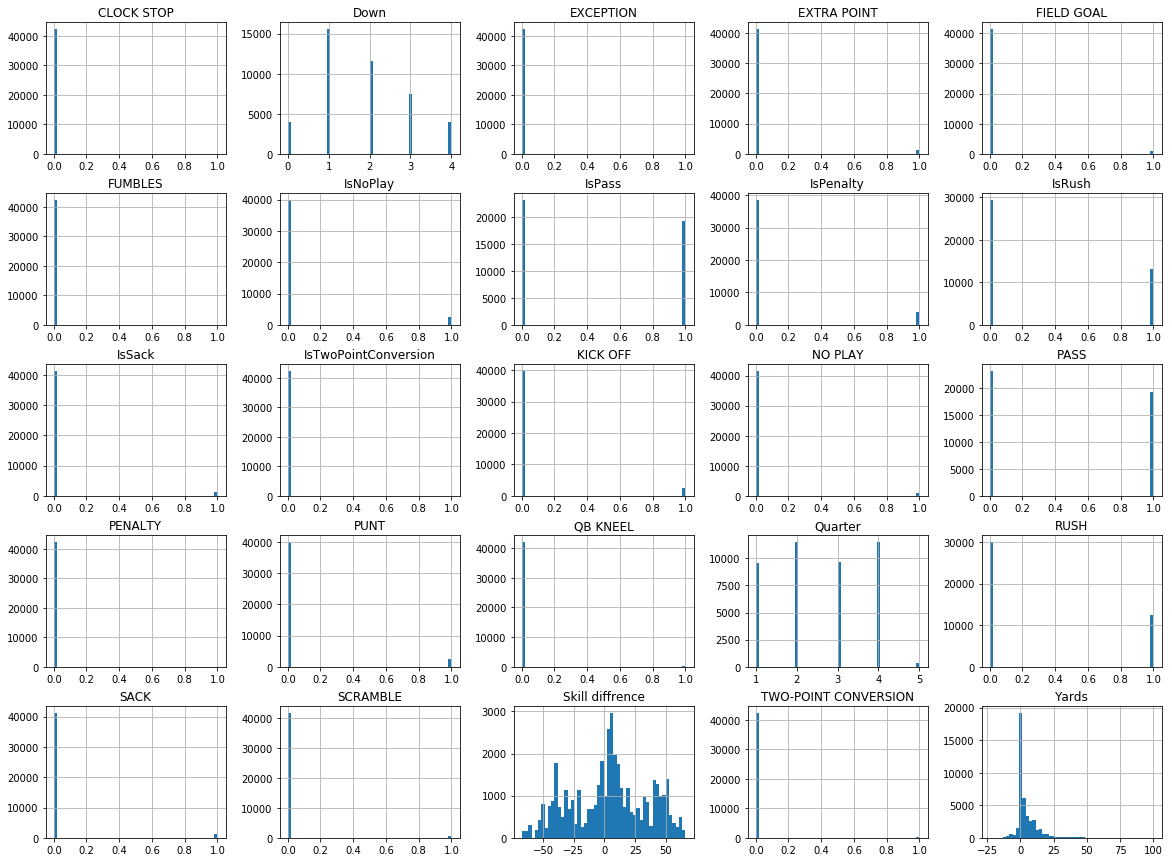

In [241]:
%matplotlib inline 
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

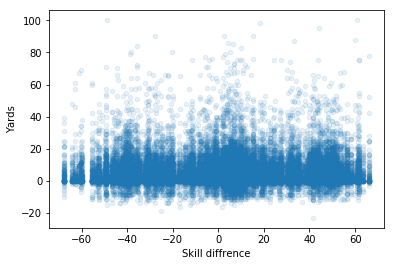

In [243]:
 data.plot(kind="scatter", x="Skill diffrence", y="Yards", alpha = 0.1)

In [245]:
corr_matrix = data.corr()
corr_matrix["Yards"].sort_values(ascending=False)

Yards                   1.000000
PASS                    0.305823
IsPass                  0.305823
SCRAMBLE                0.045438
Skill diffrence         0.006929
Quarter                -0.003138
Down                   -0.003882
PENALTY                -0.005823
IsRush                 -0.007304
RUSH                   -0.020086
EXCEPTION              -0.020847
CLOCK STOP             -0.021960
FUMBLES                -0.025542
TWO-POINT CONVERSION   -0.026588
IsTwoPointConversion   -0.026716
IsPenalty              -0.034058
QB KNEEL               -0.050717
IsNoPlay               -0.064173
NO PLAY                -0.078103
FIELD GOAL             -0.084517
EXTRA POINT            -0.091543
PUNT                   -0.132511
KICK OFF               -0.138484
IsSack                 -0.221307
SACK                   -0.221307
Name: Yards, dtype: float64